<a href="https://colab.research.google.com/github/cyrus303/20-Web-Projects/blob/main/Energy_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [335]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [115]:
df_main = pd.read_excel('EnMS_Building_Data.xlsx', skiprows=4)

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


In [116]:
df_main.head(5)

,Unnamed: 0,Consumption (kWh),2021,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92
0,NaN,Location,January,February,March,April,May,June,July,August,...,April,May,June,July,August,September,October,November,December,TOTAL
1,1,Airport ESB International,35289,33823,33902,31574,32033,28499,33789,42420,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2,"St Margarets Road, Finglas",135608,123910,163791,125649,89552,28142,24941,24467,...,101975.364,91313.895,77191.498,70422.55,66974.728,72809.867,87462.99,100314.525,105334.012,1177914.456
3,3,"Cork, Wilton, Sarsfield Road",111750,100840,104869,96732,90287,82547,80946,76385,...,124264.836,123681.781,120844.501,119822.396,109316.065,108880.717,117840.84,122831.593,136302.503,1488037.441
4,4,Leopardstown Road Phase 1 & 2,106223,93805,94499,80863,75281,54597,54266,52524,...,106111.672,98768.087,81815.415,77536.949,75995.354,85438.876,92613.84,104546.725,112332.185,1230810.485


In [117]:
df_main.drop(columns=df_main.columns[0], axis=1, inplace=True)

In [119]:
df_main = df_main.rename(columns=df_main.iloc[0]).drop(df_main.index[0])

In [120]:
df_main.head(5)

,Location,January,February,March,April,May,June,July,August,September,...,April,May,June,July,August,September,October,November,December,TOTAL
1,Airport ESB International,35289,33823,33902,31574,32033,28499,33789,42420,35317,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,"St Margarets Road, Finglas",135608,123910,163791,125649,89552,28142,24941,24467,24773,...,101975.364,91313.895,77191.498,70422.55,66974.728,72809.867,87462.99,100314.525,105334.012,1177914.456
3,"Cork, Wilton, Sarsfield Road",111750,100840,104869,96732,90287,82547,80946,76385,75821,...,124264.836,123681.781,120844.501,119822.396,109316.065,108880.717,117840.84,122831.593,136302.503,1488037.441
4,Leopardstown Road Phase 1 & 2,106223,93805,94499,80863,75281,54597,54266,52524,51533,...,106111.672,98768.087,81815.415,77536.949,75995.354,85438.876,92613.84,104546.725,112332.185,1230810.485
5,Leopardstown Rd Phase 1,52670,46834,46032,40561,37089,27906,27903,27899,27579,...,47231.422,43597.515,34790.319,32095.167,31324.348,35560.403,39442.373,46215.849,48708.932,537547.704


In [121]:
df = df_main.copy()

In [125]:
df.tail(10)

,Location,January,February,March,April,May,June,July,August,September,...,April,May,June,July,August,September,October,November,December,TOTAL
39,"Electric Ireland, 3rd Floor West Side, Swift S...",5016,4035,3021,2924,2495,2415,2008,2009,2745,...,3984.408,3919.98,3653.812,4153.357,3952.717,3959.64,4323.229,4751.383,4759.388,50208
40,"Electric Ireland, Ground Floor, East side, Swi...",6932,5576,3236,3132,2874,2782,4035,4035,3836,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
41,"Electric Ireland, 4th Floor, Swift Square",993,798,819,793,275,276,764,518,707,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,"Moynehall, Cavan",6767,6113,7950,7950,5110,5110,5170,5170,1760,...,16724.257,16029.783,14759.092,14997.326,14529.033,15193.475,16838.009,14428.617,14133.374,204140
43,"F&E, Broomhill Road, Tallaght",14502,13098,11943,11557,10799,10451,9920,9280,10050,...,12668.398,13346.443,12303.557,13058.985,11591.015,12594.473,13916.613,14706.901,14226.486,162794.473
44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,South Lotts Road kWh 2021 - investigation into...,January,February,March,April,May,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,kWh when meter was out of comms,71021,64717,72246,68983,71122,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,Revised kWh when meter repaired in September 2021,95159,86605,75883,64684,54909,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
df.drop(df.tail(5).index,
        inplace = True)

In [127]:
df.tail(10)

,Location,January,February,March,April,May,June,July,August,September,...,April,May,June,July,August,September,October,November,December,TOTAL
34,"Electric Ireland, 1st Floor East Side, Swift S...",2013,1619,1105,1070,913,884,1930,1931,984,...,2837.819,2791.884,2602.298,2675.053,2516.825,2982.654,3408.962,3418.164,3390.874,36691
35,"Electric Ireland, 1st Floor West Side, Swift S...",2916,2282,1763,1707,1456,1410,1558,1558,1343,...,2910.438,2863.338,2668.903,2793.782,2634.228,3304.88,3827.016,4205.953,4213.031,39400
36,"Electric Ireland, 2nd Floor East Side, Swift S...",2756,2158,2114,2045,1745,1689,316,317,1196,...,3670.31,3611.054,3365.891,3459.842,3255.179,3824.88,4361.399,4400.367,4368.234,45983
37,"Electric Ireland, 2nd Floor West Side, Swift S...",3974,3197,2351,2275,1942,1879,3133,3134,2813,...,2872.816,2826.235,2634.29,2707.733,2547.551,4233.781,5173.879,4209.331,4067.79,41241
38,"Electric Ireland, 3rd Floor East Side, Swift S...",3153,2537,1493,1444,1232,1193,1595,1595,2513,...,2854.88,2808.74,2618.032,2643.726,2481.971,2691.572,3005.448,3302.999,3308.553,35724
39,"Electric Ireland, 3rd Floor West Side, Swift S...",5016,4035,3021,2924,2495,2415,2008,2009,2745,...,3984.408,3919.98,3653.812,4153.357,3952.717,3959.64,4323.229,4751.383,4759.388,50208
40,"Electric Ireland, Ground Floor, East side, Swi...",6932,5576,3236,3132,2874,2782,4035,4035,3836,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
41,"Electric Ireland, 4th Floor, Swift Square",993,798,819,793,275,276,764,518,707,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,"Moynehall, Cavan",6767,6113,7950,7950,5110,5110,5170,5170,1760,...,16724.257,16029.783,14759.092,14997.326,14529.033,15193.475,16838.009,14428.617,14133.374,204140
43,"F&E, Broomhill Road, Tallaght",14502,13098,11943,11557,10799,10451,9920,9280,10050,...,12668.398,13346.443,12303.557,13058.985,11591.015,12594.473,13916.613,14706.901,14226.486,162794.473


In [128]:
df_clean_data = df.copy()

#Data cleaning done
removed unwanted rows and columns

In [207]:
pd.set_option('max_columns', None)

In [268]:
d1 = df_clean_data.copy()

https://stackoverflow.com/questions/40774787/renaming-columns-in-a-pandas-dataframe-with-duplicate-column-names

In [269]:
# Columns to not rename
excluded = df.columns[~df.columns.duplicated(keep=False)]

# An incrementer
import itertools
inc = itertools.count().__next__

# A renamer
def ren(name):
    return f"{name}{inc()}" if name not in excluded else name

# Use inside rename()
d1 = d1.rename(columns=ren)

In [270]:
d1.head(3)

,Location,January0,February1,March2,April3,May4,June5,July6,August7,September8,October9,November10,December11,TOTAL12,January13,February14,March15,April16,May17,June18,July19,August20,September21,October22,November23,December24,TOTAL25,January26,February27,March28,April29,May30,June31,July32,August33,September34,October35,November36,December37,TOTAL38,January39,February40,March41,April42,May43,June44,July45,August46,September47,October48,November49,December50,TOTAL51,January52,February53,March54,April55,May56,June57,July58,August59,September60,October61,November62,December63,TOTAL64,January65,February66,March67,April68,May69,June70,July71,August72,September73,October74,November75,December76,TOTAL77,January78,February79,March80,April81,May82,June83,July84,August85,September86,October87,November88,December89,TOTAL90
1,Airport ESB International,35289,33823,33902,31574,32033,28499,33789,42420,35317,34210,39048,44624,424528,68212,61423,32222,42508,43925,43654,49264,48869,46184,46676,47826,38112,568875,89730,68518,76310,77057,84654,78188,92795,90806,84270,80502,72238,59789,954857,126832.752,124671.96,126611.64,119770.416,119770.416,117368.712,117231.552,129531.528,133590.744,124318.008,142848.144,161871.48,1544417.352,114484.968,124126.992,132437.736,119105.568,122852.52,115797.312,113638.896,121700.808,123094.152,115525.368,114970.248,110782.728,1428517.296,98413.392,110509.536,98619.504,83654.656,69301.776,61003.872,64732.224,61392.648,77582.952,86542.416,93992.472,88466.472,994211.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,"St Margarets Road, Finglas",135608,123910,163791,125649,89552,28142,24941,24467,24773,42389,54174,57241,894637,144824,147772,138304,89588,86917,68682,97866,78667,72797,101908,91329,122862,1241516,161166,145350,140008,137333,107793,82870,75175,74938,69970,93831,143771,151767,1383972,185132.539,168646.992,195554.502,134559.538,134559.538,126332.366,85824.043,87090.251,86053.629,133231.512,172276.563,175038.129,1684299.602,186273.145,152517.875,134904.714,114802.691,101054.047,81869.123,71018.325,84894.648,108655.871,131049.12,171675.027,178306.302,1517020.888,157940.245,165422.337,154620.439,133248.761,87756.231,60996.018,58594.212,63618.344,68609.33,64801.408,116425.862,134407.721,1266440.908,144724.827,126925.862,132464.338,101975.364,91313.895,77191.498,70422.55,66974.728,72809.867,87462.99,100314.525,105334.012,1177914.456
3,"Cork, Wilton, Sarsfield Road",111750,100840,104869,96732,90287,82547,80946,76385,75821,84441,89726,91982,1086326,127829,118879,116926,85389,83611,80957,88681,88196,88401,102408,104555,103917,1189749,113929,111393,122485,113877,106206,97048,99196,92182,85890,99141,111727,121890,1274964,130165.633,124756.428,137312.903,112464.985,112464.985,111228.277,103860.733,105261.324,96683.654,93219.697,100799.795,110194.021,1338412.435,126008.1,114962.436,124172.006,108704.328,110771.821,113098.369,115032.685,119466.161,111257.737,128726.052,126498.086,116997.361,1415695.142,139382.281,127593.312,128880.649,117851.352,112032.182,106598.482,110077.98,115791.216,111078.347,115889.042,127523.675,120616.117,1433314.635,135273.85,131002.526,137975.833,124264.836,123681.781,120844.501,119822.396,109316.065,108880.717,117840.84,122831.593,136302.503,1488037.441


In [271]:
# Getting shape of the df
shape = d1.shape
  
# Printing Number of columns
print('Number of columns :', shape[1])
print('Number of rows :', shape[0])

Number of columns : 92
Number of rows : 43


2021

In [272]:
df_2021 = d1.copy()

In [273]:
df_2021 = df_2021.drop(df_2021.iloc[:, 13:92],axis = 1)

In [274]:
df_2021.head()

,Location,January0,February1,March2,April3,May4,June5,July6,August7,September8,October9,November10,December11
1,Airport ESB International,35289,33823,33902,31574,32033,28499,33789,42420,35317,34210,39048,44624
2,"St Margarets Road, Finglas",135608,123910,163791,125649,89552,28142,24941,24467,24773,42389,54174,57241
3,"Cork, Wilton, Sarsfield Road",111750,100840,104869,96732,90287,82547,80946,76385,75821,84441,89726,91982
4,Leopardstown Road Phase 1 & 2,106223,93805,94499,80863,75281,54597,54266,52524,51533,64687,78531,99176
5,Leopardstown Rd Phase 1,52670,46834,46032,40561,37089,27906,27903,27899,27579,33129,40042,45935


In [275]:
# Getting shape of the df
shape = df_2021.shape
  
# Printing Number of columns
print('Number of columns :', shape[1])
print('Number of rows :', shape[0])

Number of columns : 13
Number of rows : 43


2020

In [297]:
df_2020 = d1.copy()

In [298]:
d1.head()

,Location,January0,February1,March2,April3,May4,June5,July6,August7,September8,October9,November10,December11,TOTAL12,January13,February14,March15,April16,May17,June18,July19,August20,September21,October22,November23,December24,TOTAL25,January26,February27,March28,April29,May30,June31,July32,August33,September34,October35,November36,December37,TOTAL38,January39,February40,March41,April42,May43,June44,July45,August46,September47,October48,November49,December50,TOTAL51,January52,February53,March54,April55,May56,June57,July58,August59,September60,October61,November62,December63,TOTAL64,January65,February66,March67,April68,May69,June70,July71,August72,September73,October74,November75,December76,TOTAL77,January78,February79,March80,April81,May82,June83,July84,August85,September86,October87,November88,December89,TOTAL90
1,Airport ESB International,35289,33823,33902,31574,32033,28499,33789,42420,35317,34210,39048,44624,424528,68212,61423,32222,42508,43925,43654,49264,48869,46184,46676,47826,38112,568875,89730,68518,76310,77057,84654,78188,92795,90806,84270,80502,72238,59789,954857,126832.752,124671.96,126611.64,119770.416,119770.416,117368.712,117231.552,129531.528,133590.744,124318.008,142848.144,161871.48,1544417.352,114484.968,124126.992,132437.736,119105.568,122852.52,115797.312,113638.896,121700.808,123094.152,115525.368,114970.248,110782.728,1428517.296,98413.392,110509.536,98619.504,83654.656,69301.776,61003.872,64732.224,61392.648,77582.952,86542.416,93992.472,88466.472,994211.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,"St Margarets Road, Finglas",135608,123910,163791,125649,89552,28142,24941,24467,24773,42389,54174,57241,894637,144824,147772,138304,89588,86917,68682,97866,78667,72797,101908,91329,122862,1241516,161166,145350,140008,137333,107793,82870,75175,74938,69970,93831,143771,151767,1383972,185132.539,168646.992,195554.502,134559.538,134559.538,126332.366,85824.043,87090.251,86053.629,133231.512,172276.563,175038.129,1684299.602,186273.145,152517.875,134904.714,114802.691,101054.047,81869.123,71018.325,84894.648,108655.871,131049.12,171675.027,178306.302,1517020.888,157940.245,165422.337,154620.439,133248.761,87756.231,60996.018,58594.212,63618.344,68609.33,64801.408,116425.862,134407.721,1266440.908,144724.827,126925.862,132464.338,101975.364,91313.895,77191.498,70422.55,66974.728,72809.867,87462.99,100314.525,105334.012,1177914.456
3,"Cork, Wilton, Sarsfield Road",111750,100840,104869,96732,90287,82547,80946,76385,75821,84441,89726,91982,1086326,127829,118879,116926,85389,83611,80957,88681,88196,88401,102408,104555,103917,1189749,113929,111393,122485,113877,106206,97048,99196,92182,85890,99141,111727,121890,1274964,130165.633,124756.428,137312.903,112464.985,112464.985,111228.277,103860.733,105261.324,96683.654,93219.697,100799.795,110194.021,1338412.435,126008.1,114962.436,124172.006,108704.328,110771.821,113098.369,115032.685,119466.161,111257.737,128726.052,126498.086,116997.361,1415695.142,139382.281,127593.312,128880.649,117851.352,112032.182,106598.482,110077.98,115791.216,111078.347,115889.042,127523.675,120616.117,1433314.635,135273.85,131002.526,137975.833,124264.836,123681.781,120844.501,119822.396,109316.065,108880.717,117840.84,122831.593,136302.503,1488037.441
4,Leopardstown Road Phase 1 & 2,106223,93805,94499,80863,75281,54597,54266,52524,51533,64687,78531,99176,905985,101511,95096,96232,70837,66329,62686,65296,62371,62937,75960,80027,96954,936236,126239,108734,112701,106740,96158,81926,78453,76829,76678,88090,96145,98751,1147444,133244.91,124079.965,133666.487,114374.037,114374.037,99047.393,77377.101,79182.955,78745.612,81652.309,101319.363,114093.272,1251157.441,125471.315,113298.49,112071.818,96520.044,90619.57,78714.901,79235.741,79919.144,83319.146,92957.895,111158.675,121849.814,1185136.553,124212.363,122293.324,119876.311,108600.154,91625.622,78390.704,78603.624,78641.399,79921.865,96663.504,117486.009,116134.889,1212449.768,141026.168,125887.929,128737.285,106111.672,98768.087,81815

In [299]:
''' Remove columns between two column using column name - using loc() '''
 
df_2020 = df_2020.drop(df_2020.loc[:, 'January0':'TOTAL12'].columns, axis = 1)
df_2020 = df_2020.drop(df_2020.loc[:, 'TOTAL25':'TOTAL90'].columns, axis = 1)


In [300]:
df_2020.head()

,Location,January13,February14,March15,April16,May17,June18,July19,August20,September21,October22,November23,December24
1,Airport ESB International,68212,61423,32222,42508,43925,43654,49264,48869,46184,46676,47826,38112
2,"St Margarets Road, Finglas",144824,147772,138304,89588,86917,68682,97866,78667,72797,101908,91329,122862
3,"Cork, Wilton, Sarsfield Road",127829,118879,116926,85389,83611,80957,88681,88196,88401,102408,104555,103917
4,Leopardstown Road Phase 1 & 2,101511,95096,96232,70837,66329,62686,65296,62371,62937,75960,80027,96954
5,Leopardstown Rd Phase 1,59133,55865,54188,29911,25137,24141,27455,28374,28239,34139,38821,47504


In [301]:
# Getting shape of the df
shape = df_2020.shape
  
# Printing Number of columns
print('Number of columns :', shape[1])
print('Number of rows :', shape[0])

Number of columns : 13
Number of rows : 43


2019

In [308]:
df_2019 = d1.copy()
''' Remove columns between two column using column name - using loc() '''
 
df_2019 = df_2019.drop(df_2019.loc[:, 'January0':'TOTAL25'].columns, axis = 1)
df_2019 = df_2019.drop(df_2019.loc[:, 'TOTAL38':'TOTAL90'].columns, axis = 1)

# Getting shape of the df
shape = df_2019.shape
  
# Printing Number of columns
print('Number of columns :', shape[1])
print('Number of rows :', shape[0])

Number of columns : 13
Number of rows : 43


In [309]:
df_2019.head()

,Location,January26,February27,March28,April29,May30,June31,July32,August33,September34,October35,November36,December37
1,Airport ESB International,89730,68518,76310,77057,84654,78188,92795,90806,84270,80502,72238,59789
2,"St Margarets Road, Finglas",161166,145350,140008,137333,107793,82870,75175,74938,69970,93831,143771,151767
3,"Cork, Wilton, Sarsfield Road",113929,111393,122485,113877,106206,97048,99196,92182,85890,99141,111727,121890
4,Leopardstown Road Phase 1 & 2,126239,108734,112701,106740,96158,81926,78453,76829,76678,88090,96145,98751
5,Leopardstown Rd Phase 1,62636,51636,54334,52090,47162,39255,36066,34818,36239,45606,55466,56657


2018


In [310]:
df_2018 = d1.copy()
''' Remove columns between two column using column name - using loc() '''
 
df_2018 = df_2018.drop(df_2018.loc[:, 'January0':'TOTAL38'].columns, axis = 1)
df_2018 = df_2018.drop(df_2018.loc[:, 'TOTAL51':'TOTAL90'].columns, axis = 1)

# Getting shape of the df
shape = df_2018.shape
  
# Printing Number of columns
print('Number of columns :', shape[1])
print('Number of rows :', shape[0])

Number of columns : 13
Number of rows : 43


In [311]:
df_2018.head()

,Location,January39,February40,March41,April42,May43,June44,July45,August46,September47,October48,November49,December50
1,Airport ESB International,126832.752,124671.96,126611.64,119770.416,119770.416,117368.712,117231.552,129531.528,133590.744,124318.008,142848.144,161871.48
2,"St Margarets Road, Finglas",185132.539,168646.992,195554.502,134559.538,134559.538,126332.366,85824.043,87090.251,86053.629,133231.512,172276.563,175038.129
3,"Cork, Wilton, Sarsfield Road",130165.633,124756.428,137312.903,112464.985,112464.985,111228.277,103860.733,105261.324,96683.654,93219.697,100799.795,110194.021
4,Leopardstown Road Phase 1 & 2,133244.91,124079.965,133666.487,114374.037,114374.037,99047.393,77377.101,79182.955,78745.612,81652.309,101319.363,114093.272
5,Leopardstown Rd Phase 1,66471.403,61906.506,69232.388,58415.461,58415.461,47750.424,34705.112,35026.608,34740.416,35703.069,47698.625,55382.378


2017

In [312]:
df_2017 = d1.copy()
''' Remove columns between two column using column name - using loc() '''
 
df_2017 = df_2017.drop(df_2017.loc[:, 'January0':'TOTAL51'].columns, axis = 1)
df_2017 = df_2017.drop(df_2017.loc[:, 'TOTAL64':'TOTAL90'].columns, axis = 1)

# Getting shape of the df
shape = df_2017.shape
  
# Printing Number of columns
print('Number of columns :', shape[1])
print('Number of rows :', shape[0])

Number of columns : 13
Number of rows : 43


In [313]:
df_2017.head()

,Location,January52,February53,March54,April55,May56,June57,July58,August59,September60,October61,November62,December63
1,Airport ESB International,114484.968,124126.992,132437.736,119105.568,122852.52,115797.312,113638.896,121700.808,123094.152,115525.368,114970.248,110782.728
2,"St Margarets Road, Finglas",186273.145,152517.875,134904.714,114802.691,101054.047,81869.123,71018.325,84894.648,108655.871,131049.12,171675.027,178306.302
3,"Cork, Wilton, Sarsfield Road",126008.1,114962.436,124172.006,108704.328,110771.821,113098.369,115032.685,119466.161,111257.737,128726.052,126498.086,116997.361
4,Leopardstown Road Phase 1 & 2,125471.315,113298.49,112071.818,96520.044,90619.57,78714.901,79235.741,79919.144,83319.146,92957.895,111158.675,121849.814
5,Leopardstown Rd Phase 1,57626.414,52054.1,51272.948,42070.064,39611.511,34401.885,34158.361,35201.703,37158.162,43136.782,53335.265,60000.982


2016

In [314]:
df_2016 = d1.copy()
''' Remove columns between two column using column name - using loc() '''
 
df_2016 = df_2016.drop(df_2016.loc[:, 'January0':'TOTAL64'].columns, axis = 1)
df_2016 = df_2016.drop(df_2016.loc[:, 'TOTAL77':'TOTAL90'].columns, axis = 1)

# Getting shape of the df
shape = df_2016.shape
  
# Printing Number of columns
print('Number of columns :', shape[1])
print('Number of rows :', shape[0])

Number of columns : 13
Number of rows : 43


In [315]:
df_2016.head()

,Location,January65,February66,March67,April68,May69,June70,July71,August72,September73,October74,November75,December76
1,Airport ESB International,98413.392,110509.536,98619.504,83654.656,69301.776,61003.872,64732.224,61392.648,77582.952,86542.416,93992.472,88466.472
2,"St Margarets Road, Finglas",157940.245,165422.337,154620.439,133248.761,87756.231,60996.018,58594.212,63618.344,68609.33,64801.408,116425.862,134407.721
3,"Cork, Wilton, Sarsfield Road",139382.281,127593.312,128880.649,117851.352,112032.182,106598.482,110077.98,115791.216,111078.347,115889.042,127523.675,120616.117
4,Leopardstown Road Phase 1 & 2,124212.363,122293.324,119876.311,108600.154,91625.622,78390.704,78603.624,78641.399,79921.865,96663.504,117486.009,116134.889
5,Leopardstown Rd Phase 1,56362.78,55880.235,54032.443,48131.197,39689.241,34594.395,32752.661,32993.06,34986.129,43683.92,54332.16,53004.812


2015

In [318]:
df_2015 = d1.copy()
''' Remove columns between two column using column name - using loc() '''
 
df_2015 = df_2015.drop(df_2015.loc[:, 'January0':'TOTAL77'].columns, axis = 1)
# df_2015 = df_2015.drop(df_2015.loc[:, 'TOTAL77':'TOTAL90'].columns, axis = 1)

# Getting shape of the df
shape = df_2016.shape
  
# Printing Number of columns
print('Number of columns :', shape[1])
print('Number of rows :', shape[0])

Number of columns : 13
Number of rows : 43


In [323]:
df_2015 = df_2015.drop(['TOTAL90'], axis = 1)


In [324]:
df_2015.head()

,Location,January78,February79,March80,April81,May82,June83,July84,August85,September86,October87,November88,December89
1,Airport ESB International,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"St Margarets Road, Finglas",144724.827,126925.862,132464.338,101975.364,91313.895,77191.498,70422.55,66974.728,72809.867,87462.99,100314.525,105334.012
3,"Cork, Wilton, Sarsfield Road",135273.85,131002.526,137975.833,124264.836,123681.781,120844.501,119822.396,109316.065,108880.717,117840.84,122831.593,136302.503
4,Leopardstown Road Phase 1 & 2,141026.168,125887.929,128737.285,106111.672,98768.087,81815.415,77536.949,75995.354,85438.876,92613.84,104546.725,112332.185
5,Leopardstown Rd Phase 1,62085.606,58659.633,57836.137,47231.422,43597.515,34790.319,32095.167,31324.348,35560.403,39442.373,46215.849,48708.932


#viz

In [325]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df_2021.groupby(df_2021['Location']).plot()

In [ ]:
df_2021.isnull()

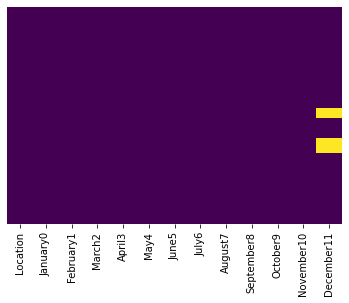

In [339]:
sns.heatmap(df_2021.isnull(),yticklabels=False,cbar=False,cmap='viridis')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


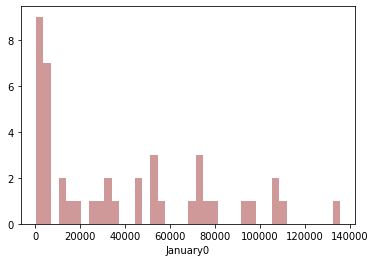

In [340]:
sns.distplot(df_2021['January0'].dropna(),kde=False,color='darkred',bins=40)

In [345]:
loc_10 = df_2021.Location[:10]

In [346]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='January0',y='Location',data=loc_10,palette='winter')

ValueError: ignored

<Figure size 864x504 with 0 Axes>